In [1]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob
import os
#해안선 받아놓기
coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')  


In [2]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='red', edgecolor='black',linewidth=0.5, zorder=1)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')


In [3]:
MIN1_raw = gpd.read_file('./Ex/MIN1_DOWFSA_UTF8_mod/MIN1_DOWFSA_UTF8_mod.shp', encoding='euc-kr')  
MIN1 = MIN1_raw[['MIN1', 'geometry']]

In [3]:
EEZ = gpd.read_file('./Ex/220104/EEZ폴리곤_수정.shp', encoding='utf8') 
UNDER_SEA = gpd.read_file('./Ex/220105/해저지형(1min)_유효값.shp', encoding='utf8')

In [5]:
flist = glob.glob('./Ex/220110/법정정보/**/*.shp', recursive=True)
for fname in flist:
    print(fname.split('\\')[2].split('.')[0])

골재채취단지
광업권
채굴권
탐사권
관광진흥관광지
마리나항만구역(면)
마리나항만구역(선)
마리나항만구역(점)
선상낚시포인트
수상레저
어촌체험마을
여객선터미널
해수욕장
해양레저활동구역
군사기지
군사보호구역
해상사격훈련구역
근해안강망어업
근해통발어업
근해형망어업
대형트롤어업
동해구중형트롤어업
선박안전교통 관제구역
수상레저금지구역
쌍끌이대형저인망어업
어선사고
어선원사고
연안정비기본계획
연안침식관리구역
연안침식실태조사
외끌이·쌍끌이대형저인망어업
중형저인망어업
침몰선박
해상교통관제센터
해저케이블
국가어항
마을어업
소규모어항
수산자원관리수면
수산자원보호구역
양식어업
어촌정주어항
정치망어업
정치성구획어업
지방어항
계측기
전원개발사업구역
해상풍력 발전사업허가
영해기점 무인도서
종합해양 과학기지
해양관측부이
교통안전특정해역
깊은수심항로
도선사승하선구역
마리나추천항로
무역항
신항만예정지역
양길항로
연안항
요트항로
일반항로
정박지구역
지방청 고시항로
지정항로
통항분리구역
통항제한금지구역
항로표지설치해역
항만구역
항만배후단지
국립공원
군립공원
도립공원
문화재구역
문화재보호구역
바다목장(면)
바다목장(점)
바다숲
생물권보전지역
생태경관보전지역
서식산란장(면)
서식산란장(점)
세계유산지정구역
습지보호구역
인공어초
자연환경보전지역
잘피숲
절대보전무인도서
준보전무인도서
천연기념물
천연보호구역
특정도서
해양보호구역
해양보호생물서식지
해중경관지구
환경보전해역


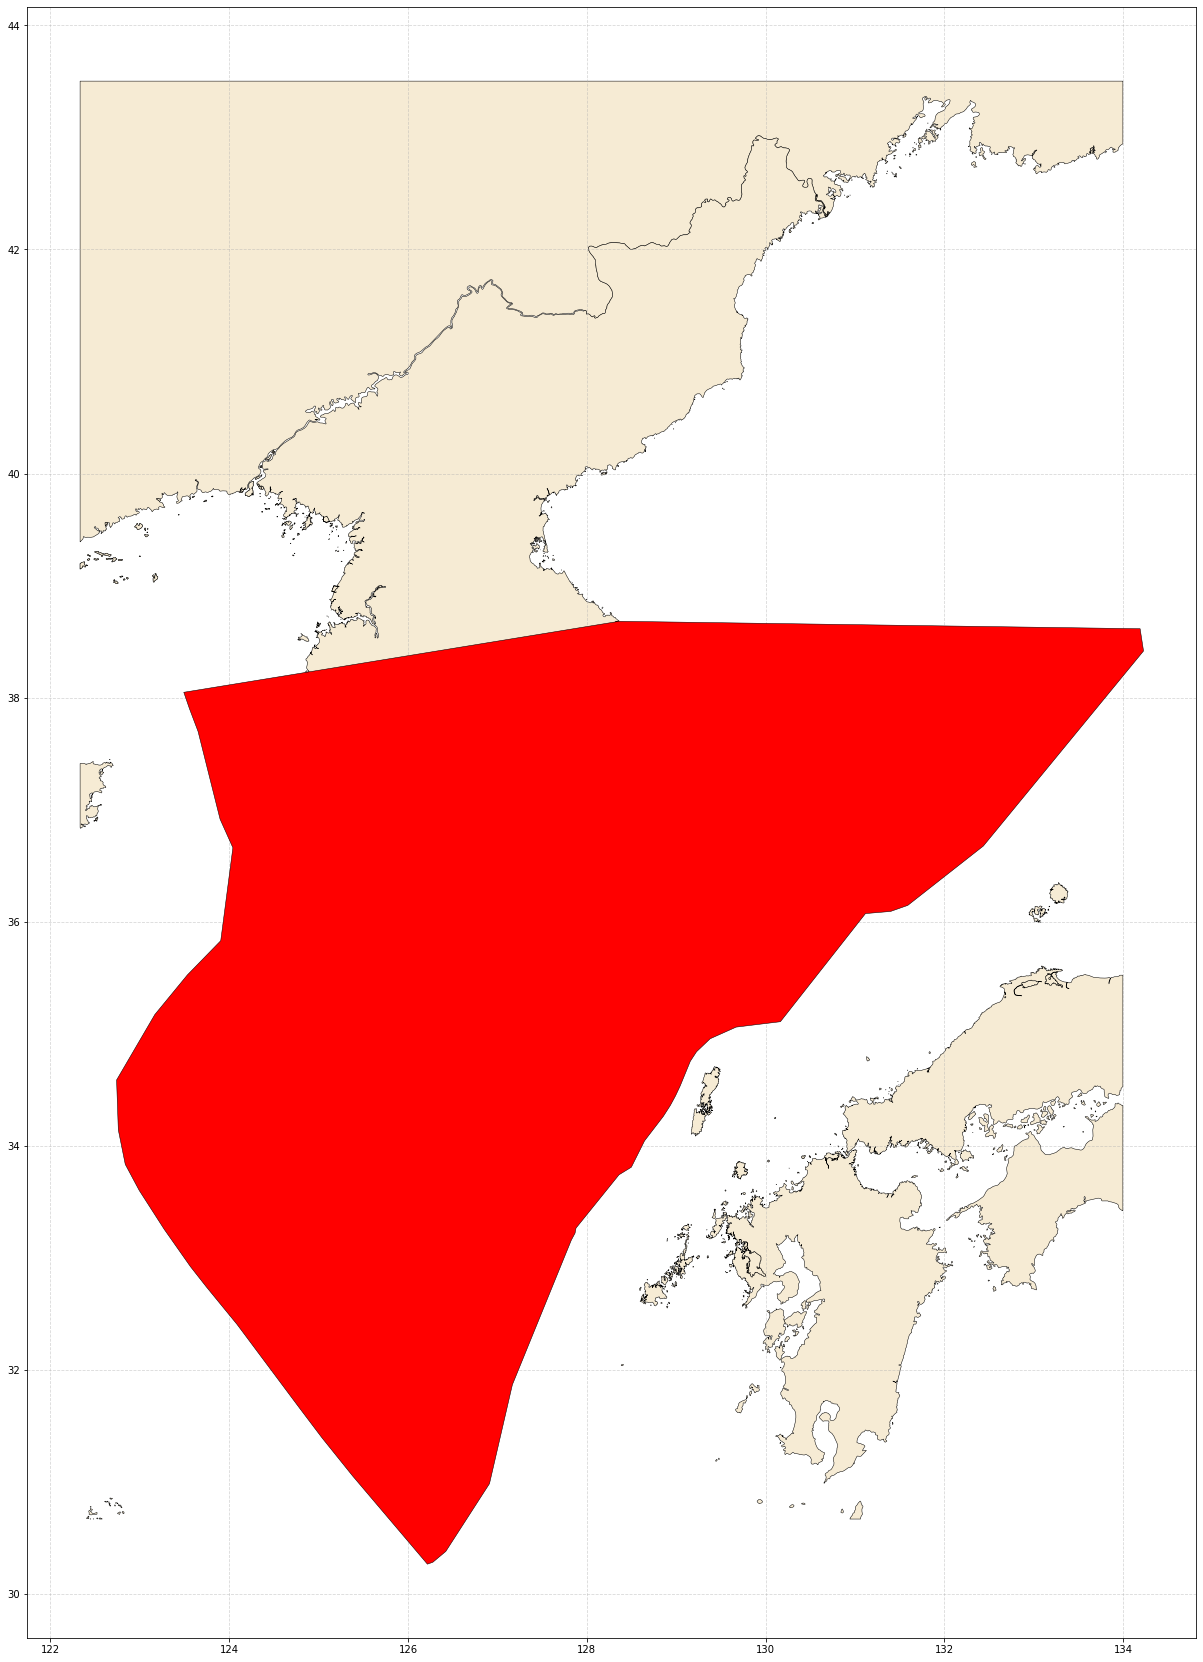

In [7]:
plot_map(EEZ)

In [4]:
result = gpd.sjoin(UNDER_SEA, EEZ,  op='intersects')
# plot_map(result)

In [5]:
result_50m = result[result['ELEVATION']>=-50]
result_60m = result[result['ELEVATION']>=-60]
result_100m = result[result['ELEVATION']>=-100]
result_50m.drop('index_right', axis =1, inplace=True)
result_60m.drop('index_right', axis =1, inplace=True)
result_100m.drop('index_right', axis =1, inplace=True)


C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r

In [8]:
result_50m.to_file('./20220224/test.shp')

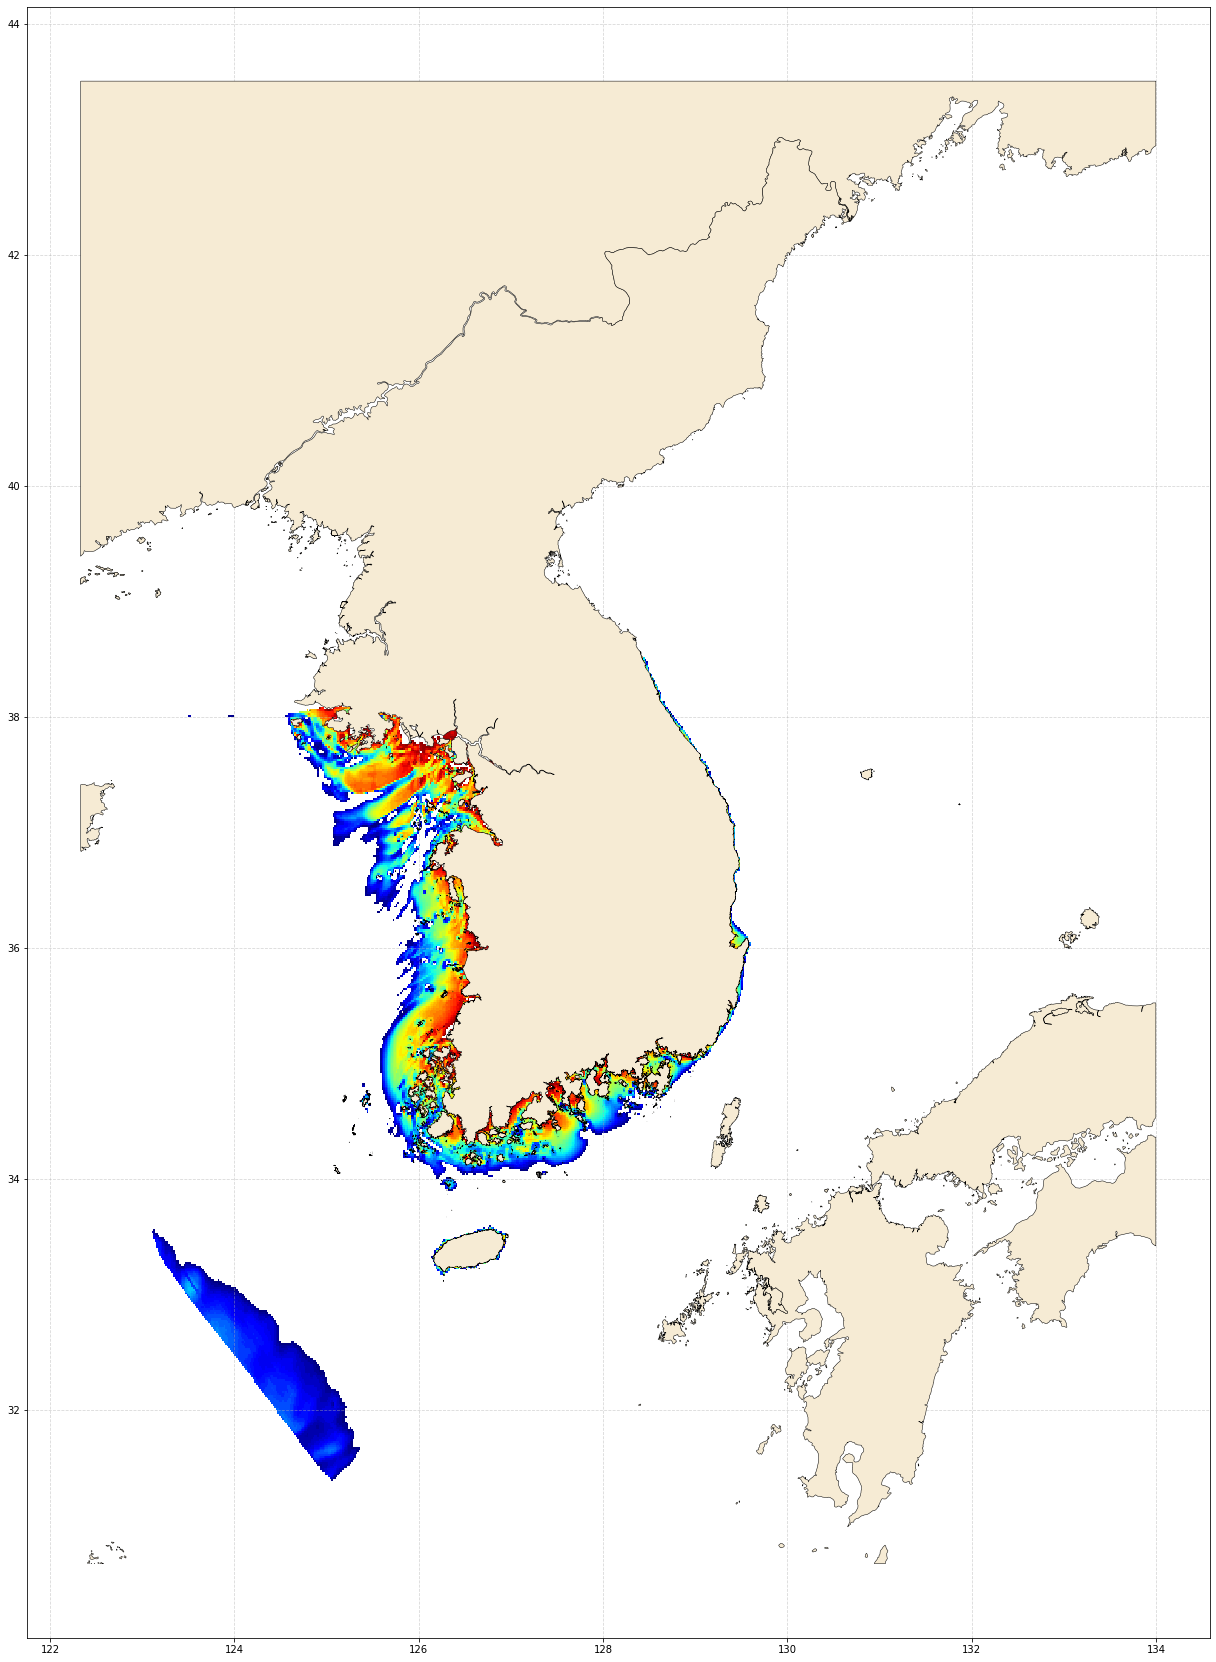

In [6]:
plot_colormap(result_50m, 'ELEVATION', 10)
# plot_colormap(result_60m, 'ELEVATION', 10)
# plot_colormap(result_100m, 'ELEVATION', 10)

In [10]:
merge_data =MIN1
for fname in flist:
    print(fname.split('\\')[2].split('.')[0])
    try:
        data = gpd.read_file(fname, encoding='euc-kr')
    except Exception as e:
        print(e)
        data = gpd.read_file(fname, encoding='utf8')

    # print(data.crs)
    data = data.to_crs(epsg=4326)
    # print(data.crs)

    if 'ELEVATION' in data.columns:
        print('ELEVATION 존재')
        data.drop('ELEVATION', axis =1, inplace =True)
    else:
        pass

    result1 = gpd.sjoin(result_50m, data,  op='intersects')
    result1.drop('index_right', axis=1, inplace=True)
    result1.drop_duplicates(['MIN1'], keep='first', inplace=True)
    result1 = result1[['MIN1', 'ELEVATION']]
    result1[fname.split('\\')[2].split('.')[0]] = 1

    match = pd.merge(MIN1, result1, on='MIN1', how='outer')
    match.drop('geometry', axis=1, inplace=True)
    merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')

    

# merge_data.to_file('./result/ex7/shp/ex7.shp', encoding='euckr')
merge_data.drop('geometry', axis =1, inplace=True)
merge_data.to_csv('./result/ex7/csv/ex7_50m.csv', index = False, encoding='euckr')
   

골재채취단지
광업권
채굴권
탐사권


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


관광진흥관광지
마리나항만구역(면)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


마리나항만구역(선)
마리나항만구역(점)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


선상낚시포인트
수상레저


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


어촌체험마을
여객선터미널


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해수욕장
해양레저활동구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


군사기지
군사보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해상사격훈련구역
근해안강망어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


근해통발어업
근해형망어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


대형트롤어업
동해구중형트롤어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


선박안전교통 관제구역
수상레저금지구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


쌍끌이대형저인망어업
어선사고


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


어선원사고
연안정비기본계획


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


연안침식관리구역
연안침식실태조사


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


외끌이·쌍끌이대형저인망어업
중형저인망어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


침몰선박
해상교통관제센터


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해저케이블
국가어항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


마을어업
소규모어항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


수산자원관리수면
수산자원보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


양식어업
어촌정주어항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


정치망어업
정치성구획어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


지방어항
계측기


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


전원개발사업구역
해상풍력 발전사업허가


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


영해기점 무인도서
종합해양 과학기지


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해양관측부이
교통안전특정해역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


깊은수심항로
도선사승하선구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


마리나추천항로
무역항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


신항만예정지역
양길항로


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


연안항
요트항로


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


일반항로
정박지구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


지방청 고시항로
지정항로


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


통항분리구역
통항제한금지구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


항로표지설치해역
항만구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


항만배후단지
국립공원


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


군립공원
도립공원


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


문화재구역
문화재보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


바다목장(면)
바다목장(점)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


바다숲
생물권보전지역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


생태경관보전지역
서식산란장(면)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


서식산란장(점)
세계유산지정구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


습지보호구역
인공어초


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


자연환경보전지역
잘피숲
ELEVATION 존재


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


절대보전무인도서
준보전무인도서


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


천연기념물
천연보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


특정도서
해양보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해양보호생물서식지
해중경관지구


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/1914623572.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


환경보전해역


In [11]:
merge_data =MIN1
for fname in flist:
    print(fname.split('\\')[2].split('.')[0])
    try:
        data = gpd.read_file(fname, encoding='euc-kr')
    except Exception as e:
        print(e)
        data = gpd.read_file(fname, encoding='utf8')

    # print(data.crs)
    data = data.to_crs(epsg=4326)
    # print(data.crs)

    if 'ELEVATION' in data.columns:
        print('ELEVATION 존재')
        data.drop('ELEVATION', axis =1, inplace =True)
    else:
        pass

    result1 = gpd.sjoin(result_60m, data,  op='intersects')
    result1.drop('index_right', axis=1, inplace=True)
    result1.drop_duplicates(['MIN1'], keep='first', inplace=True)
    result1 = result1[['MIN1', 'ELEVATION']]
    result1[fname.split('\\')[2].split('.')[0]] = 1

    match = pd.merge(MIN1, result1, on='MIN1', how='outer')
    match.drop('geometry', axis=1, inplace=True)
    merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')

    

# merge_data.to_file('./result/ex7/shp/ex7.shp', encoding='euckr')
merge_data.drop('geometry', axis =1, inplace=True)
merge_data.to_csv('./result/ex7/csv/ex7_60m.csv', index = False, encoding='euckr')
   

골재채취단지
광업권
채굴권
탐사권


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


관광진흥관광지
마리나항만구역(면)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


마리나항만구역(선)
마리나항만구역(점)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


선상낚시포인트
수상레저


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


어촌체험마을
여객선터미널


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해수욕장
해양레저활동구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


군사기지
군사보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해상사격훈련구역
근해안강망어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


근해통발어업
근해형망어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


대형트롤어업
동해구중형트롤어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


선박안전교통 관제구역
수상레저금지구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


쌍끌이대형저인망어업
어선사고


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


어선원사고
연안정비기본계획


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


연안침식관리구역
연안침식실태조사


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


외끌이·쌍끌이대형저인망어업
중형저인망어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


침몰선박
해상교통관제센터


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해저케이블
국가어항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


마을어업
소규모어항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


수산자원관리수면
수산자원보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


양식어업
어촌정주어항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


정치망어업
정치성구획어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


지방어항
계측기


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


전원개발사업구역
해상풍력 발전사업허가


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


영해기점 무인도서
종합해양 과학기지


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해양관측부이
교통안전특정해역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


깊은수심항로
도선사승하선구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


마리나추천항로
무역항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


신항만예정지역
양길항로


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


연안항
요트항로


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


일반항로
정박지구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


지방청 고시항로
지정항로


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


통항분리구역
통항제한금지구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


항로표지설치해역
항만구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


항만배후단지
국립공원


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


군립공원
도립공원


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


문화재구역
문화재보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


바다목장(면)
바다목장(점)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


바다숲
생물권보전지역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


생태경관보전지역
서식산란장(면)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


서식산란장(점)
세계유산지정구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


습지보호구역
인공어초


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


자연환경보전지역
잘피숲
ELEVATION 존재


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


절대보전무인도서
준보전무인도서


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


천연기념물
천연보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


특정도서
해양보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해양보호생물서식지
해중경관지구


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/837818101.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


환경보전해역


In [12]:
merge_data =MIN1
for fname in flist:
    print(fname.split('\\')[2].split('.')[0])
    try:
        data = gpd.read_file(fname, encoding='euc-kr')
    except Exception as e:
        print(e)
        data = gpd.read_file(fname, encoding='utf8')

    # print(data.crs)
    data = data.to_crs(epsg=4326)
    # print(data.crs)

    if 'ELEVATION' in data.columns:
        print('ELEVATION 존재')
        data.drop('ELEVATION', axis =1, inplace =True)
    else:
        pass

    result1 = gpd.sjoin(result_100m, data,  op='intersects')
    result1.drop('index_right', axis=1, inplace=True)
    result1.drop_duplicates(['MIN1'], keep='first', inplace=True)
    result1 = result1[['MIN1', 'ELEVATION']]
    result1[fname.split('\\')[2].split('.')[0]] = 1

    match = pd.merge(MIN1, result1, on='MIN1', how='outer')
    match.drop('geometry', axis=1, inplace=True)
    merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')

    

# merge_data.to_file('./result/ex7/shp/ex7.shp', encoding='euckr')
merge_data.drop('geometry', axis =1, inplace=True)
merge_data.to_csv('./result/ex7/csv/ex7_100m.csv', index = False, encoding='euckr')
   

골재채취단지
광업권
채굴권
탐사권


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


관광진흥관광지
마리나항만구역(면)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


마리나항만구역(선)
마리나항만구역(점)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


선상낚시포인트
수상레저


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


어촌체험마을
여객선터미널


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해수욕장
해양레저활동구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


군사기지
군사보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해상사격훈련구역
근해안강망어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


근해통발어업
근해형망어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


대형트롤어업
동해구중형트롤어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


선박안전교통 관제구역
수상레저금지구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


쌍끌이대형저인망어업
어선사고


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


어선원사고
연안정비기본계획


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


연안침식관리구역
연안침식실태조사


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


외끌이·쌍끌이대형저인망어업
중형저인망어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


침몰선박
해상교통관제센터


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해저케이블
국가어항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


마을어업
소규모어항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


수산자원관리수면
수산자원보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


양식어업
어촌정주어항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


정치망어업
정치성구획어업


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


지방어항
계측기


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


전원개발사업구역
해상풍력 발전사업허가


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


영해기점 무인도서
종합해양 과학기지


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해양관측부이
교통안전특정해역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


깊은수심항로
도선사승하선구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


마리나추천항로
무역항


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


신항만예정지역
양길항로


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


연안항
요트항로


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


일반항로
정박지구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


지방청 고시항로
지정항로


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


통항분리구역
통항제한금지구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


항로표지설치해역
항만구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


항만배후단지
국립공원


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


군립공원
도립공원


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


문화재구역
문화재보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


바다목장(면)
바다목장(점)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


바다숲
생물권보전지역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


생태경관보전지역
서식산란장(면)


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


서식산란장(점)
세계유산지정구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


습지보호구역
인공어초


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


자연환경보전지역
잘피숲
ELEVATION 존재


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


절대보전무인도서
준보전무인도서


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


천연기념물
천연보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


특정도서
해양보호구역


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


해양보호생물서식지
해중경관지구


C:\Users\PPARK\AppData\Local\Temp/ipykernel_23436/3093228474.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ELEVATION_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_data = pd.merge(merge_data, match, on='MIN1', how='outer')


환경보전해역
